# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
#LOAD PICKLED DATA 
from tensorflow.examples.tutorials.mnist import input_data
from skimage import color
import numpy as np

#mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print('Done loading pickle files')

Done loading pickle files


In [2]:
#Set local variables
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Done setting local variables')

Done setting local variables


In [3]:
#read in the signnames
import csv
with open( 'signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    label_name = list(reader)
    #print(len(label_name))
final_label_name=label_name[1:]
#print(len(final_label_name))
print('Done loading sign names')

Done loading sign names


In [4]:
#for key,value in train.items():
    #print(key)
    #print(train[key].shape)

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
unique, counts = np.unique(y_train, return_counts=True)
unique_val, counts_val = np.unique(y_validation, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
n_classes=len(unique)
n_classes_val=len(unique_val)
n_classes_test=len(unique_test)

#print(unique,counts)
#print(y_train.shape)
#print(unique[0])
#unique_0=np.where(y_train==unique[0])[0]
#print(unique_0[0:5])
#print(np.where(y_train==unique[0])[0])
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [ ]:
# VISUALIZATION OF TRAFFIC SIGNS
import matplotlib.pyplot as plt
import numpy as np

no_images_displayed_per_class=15

%matplotlib inline
for unique_classes in unique:
    class_images=np.where(y_train==unique_classes)[0][0:no_images_displayed_per_class]
    np.random.seed(4)
    #grid = np.random.rand(4, 4)
    print(final_label_name[unique_classes])
    fig, axes = plt.subplots(1, no_images_displayed_per_class, figsize=(16,18),
                             subplot_kw={'xticks': [], 'yticks': []})

    fig.subplots_adjust(hspace=0.1, wspace=0.01)
    
    for ax, class_image in zip(axes.flat, class_images):
        #print(X_train[class_image][0][0])
        #print(class_image)
        ax.imshow(X_train[class_image].squeeze())
        #Use for grayscale images
        #ax.imshow(X_train[class_image].squeeze(),cmap='gray')
        ax.set_title(y_train[class_image])

    plt.show()

In [5]:
print(max(counts)-counts)

[1830   30    0  750  240  360 1650  720  750  690  210  840  120   90 1320
 1470 1650 1020  930 1830 1710 1740 1680 1560 1770  660 1470 1800 1530 1770
 1620 1320 1800 1411 1650  930 1680 1830  150 1740 1710 1800 1800]


In [6]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

Equalize each class sample count to max samples present in original data set
Total data size increase by 148.369206012 %
X_train shape: (34799, 32, 32, 3) (34799,)
Class Label 0
No of more samples  3840
added transformed images for Class:  0
Class Label 1
No of more samples  2040
added transformed images for Class:  1
Class Label 2
No of more samples  2010
added transformed images for Class:  2
Class Label 3
No of more samples  2760
added transformed images for Class:  3
Class Label 4
No of more samples  2250
added transformed images for Class:  4
Class Label 5
No of more samples  2370
added transformed images for Class:  5
Class Label 6
No of more samples  3660
added transformed images for Class:  6
Class Label 7
No of more samples  2730
added transformed images for Class:  7
Class Label 8
No of more samples  2760
added transformed images for Class:  8
Class Label 9
No of more samples  2700
added transformed images for Class:  9
Class Label 10
No of more samples  2220
added transforme

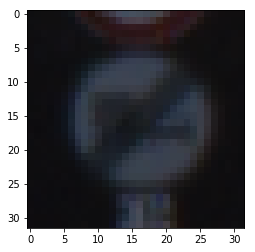

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

more_samples_required=max(counts)-counts
print('Equalize each class sample count to max samples present in original data set')
print('Total data size increase by', sum(more_samples_required)/sum(counts)*100, '%')
#print(np.median(counts))
#more_samples_required=max(counts)-counts
#for u,samples in zip(unique,more_samples_required):
#    print(u,samples)
#print(sum(more_samples_required), sum(counts))

X_train_mod=X_train
y_train_mod=y_train
print("X_train shape:",X_train.shape,y_train.shape)

more_samples_required=more_samples_required+max(counts)

for unique_class_label,no_of_more_samples in zip(unique,more_samples_required):
        class_images=np.where(y_train==unique_class_label)
        #print('No of samples',no_of_more_samples)
        tmp_array=[]
        if(no_of_more_samples>0):
            RAND_IMAGES=np.random.choice(class_images[0], no_of_more_samples, replace=True)
            #tmp_array=np.empty([len(RAND_IMAGES),X_train.shape[1],X_train.shape[2],X_train.shape[3]])
            print("Class Label",unique_class_label)
            print("No of more samples ",no_of_more_samples)
            #print("Tmp array shape",tmp_array.shape)
            
            #for i in range(0,tmp_array.shape[0]):
                #print(i)
            #    img = transform_image(X_train[i],20,10,5)
                #img=X_train[i]
            #    tmp_array[i:]=img
                #print(' transformed image : ', i)
            #X_train_mod=np.concatenate((X_train_mod, tmp_array), axis=0)
            X_train_mod=np.concatenate((X_train_mod, X_train[RAND_IMAGES]), axis=0)
            #print(X_train_mod.shape)
            y_train_mod=np.concatenate((y_train_mod, np.repeat(unique_class_label,no_of_more_samples)), axis=0)
            print('added transformed images for Class: ', unique_class_label)
            plt.imshow(X_train_mod[-1].squeeze())
            #plt.subplot(10,10,i+1)
            #plt.imshow(tmp_array[-1:].squeeze(),cmap='gray')
#print(X_train_mod.shape,y_train_mod.shape)

In [8]:
print(X_train_mod.shape,y_train_mod.shape)


(172860, 32, 32, 3) (172860,)


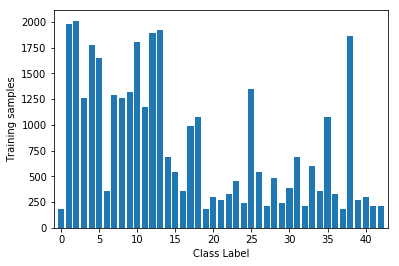

In [9]:
# VISUALIZATION OF TRAFFIC SIGNS before augmenting data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.bar( np.arange( n_classes ), counts, align='center' )
plt.xlabel('Class Label')
plt.ylabel('Training samples')
plt.xlim([-1, n_classes])
plt.show()


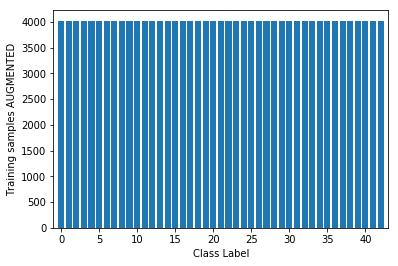

In [10]:
# VISUALIZATION OF TRAFFIC SIGNS AFTER augmenting data

unique_mod, counts_mod = np.unique(y_train_mod, return_counts=True)
plt.bar( np.arange( n_classes ), counts_mod, align='center' )
plt.xlabel('Class Label')
plt.ylabel('Training samples AUGMENTED')
plt.xlim([-1, n_classes])
plt.show()

In [ ]:
print(X_train_original.shape)
print(X_train.shape)

In [11]:
#SET TRAINING VARIABLES WITH AUGMENTED DATA
X_train_original= X_train
Y_train_original=y_train
X_train=X_train_mod
y_train=y_train_mod

In [12]:
#CONVERT ALL IMAGES TO GRAYSCALE
#X_train=color.rgb2gray(X_train)
#X_validation=color.rgb2gray(X_validation)
#X_test=color.rgb2gray(X_test)
import cv2

#X_train = cv2.cvtColor( X_train, cv2.COLOR_RGB2GRAY )
#X_validation = cv2.cvtColor( X_validation, cv2.COLOR_RGB2GRAY )
#X_test = cv2.cvtColor( X_test, cv2.COLOR_RGB2GRAY )

X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_validation = np.sum(X_validation/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)
X_train_original= np.sum(X_train_original/3, axis=3, keepdims=True)
print(X_train.shape)

(172860, 32, 32, 1)


In [13]:
#NORMALIZE THE DATA
X_train= (X_train-128)/128
X_validation=(X_validation-128)/128
X_test=(X_test-128)/128
X_train_original=(X_train_original-128)/128

#X_train, y_train           = mnist.train.images, mnist.train.labels
#X_validation, y_validation = mnist.validation.images, mnist.validation.labels
#X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print(X_train.shape)

print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

(172860, 32, 32, 1)
Image Shape: (32, 32, 1)

Training Set:   172860 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np
#X_train_mod=[]
#y_train_mod=[]

#X_train_mod=np.concatenate((X_train_mod, X_train[0]), axis=0)
#X_train_mod.append(X_train[0])
#X_train_mod=np.array(X_train_mod)
#print(X_train_mod.shape)


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#NOT REQUIRED, TRAFFIC SIGNS DATASET IS ALREADY 32X32 

#import numpy as np

# Pad images with 0s
#X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
#print("Updated Image Shape: {}".format(X_train[0].shape))

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

In [ ]:
#X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
plt.figure(figsize=(2,2))

plt.imshow(X_train[-110].squeeze(),cmap='gray')


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [16]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [17]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 200
KEEP_PROB     = 0.5

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [18]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
     
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3 [TRAFFIC SIGN DATA SET HAS 3 CHANNELS,BUT THIS GOT CONVERTED TO GRAYSCALE]. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    #IF USING RGB IMAGES, USE THIS INSTEAD WITH INPUT MATRIX CHANNELS SET TO 3
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #DROPOUT
    #conv1=tf.nn.dropout(conv1, keep_prob=KEEP_PROB)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv1 = tf.nn.dropout(conv1, keep_prob=KEEP_PROB)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2=tf.nn.dropout(conv2, keep_prob=KEEP_PROB)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2, keep_prob=KEEP_PROB)
    
    #============
    #ADDED 3RD CONVOLUTION LAYER, NOT PART OF LENET. INPUT = 5x5x16, output=5x5x16
    #conv3_W = tf.Variable(tf.truncated_normal(shape=(1,1, 16, 16), mean = mu, stddev = sigma))
    #conv3_b = tf.Variable(tf.zeros(16))
    #conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    #conv3 = tf.nn.relu(conv3)
    #conv3 = tf.nn.max_pool(conv3, ksize=[1, 1,1, 1], strides=[1, 1,1, 1], padding='VALID')
    #fc0   = flatten(conv3)
    #COMMENT OUT THIS fc0 flatten and uncomment fc0 with conv2 below
    #===========
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #fc0=tf.nn.dropout(fc0, keep_prob=KEEP_PROB)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    #fc1=tf.nn.dropout(fc1, keep_prob=KEEP_PROB)

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1=tf.nn.dropout(fc1, keep_prob=KEEP_PROB)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2=tf.nn.dropout(fc2, keep_prob=KEEP_PROB)


    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43[TRAFFIC SIGN DATA HAS 43 OUTPUT CLASSES].
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
#IF USING RGB IMAGES, USE THIS INSTEAD WITH INPUT MATRIX CHANNELS SET TO 3
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))

y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [20]:
#rate = 0.001
rate=0.00097

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    #The np.newaxis adds a new dimension of size 1 in the  last (channels) dimensions, as the tensorflow 2D convolution expects 4D array, and we converted RGB channel to grayscale and lost 1 dimension
    #X_validation = X_validation[..., np.newaxis]  
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #The np.newaxis adds a new dimension of size 1 in the  last (channels) dimensions, as the tensorflow 2D convolution expects 4D array
            #batch_x = batch_x[..., np.newaxis]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
          
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        #if (validation_accuracy>0.93):
        #    break
        
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.856

EPOCH 2 ...
Validation Accuracy = 0.893

EPOCH 3 ...
Validation Accuracy = 0.896

EPOCH 4 ...
Validation Accuracy = 0.916

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.933

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 15 ...
Validation Accuracy = 0.939

EPOCH 16 ...
Validation Accuracy = 0.922

EPOCH 17 ...
Validation Accuracy = 0.926

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 20 ...
Validation Accuracy = 0.916

EPOCH 21 ...
Validation Accuracy = 0.939

EPOCH 22 ...
Validation Accuracy = 0.915

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.934


['./web-images/4.png', './web-images/3.png', './web-images/1.png', './web-images/6.png', './web-images/5.png']
(5, 32, 32, 3)


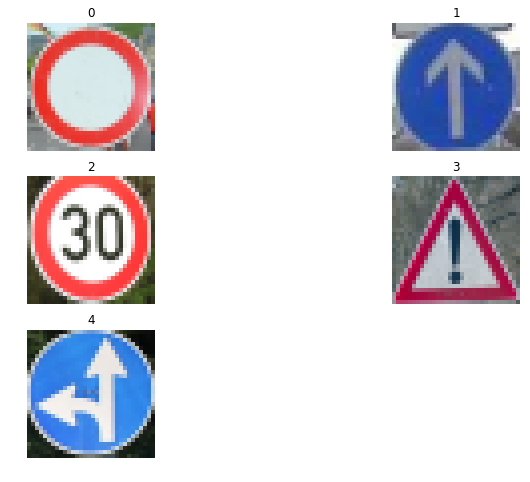

In [24]:
import glob
import cv2

num_of_samples=[]
#Import test images  
test_img_paths = [img_path for img_path in glob.glob("./web-images/*")]
print(test_img_paths)
test_img=np.uint8(np.zeros((5,32,32,3)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    test_img[i]=img

print(test_img.shape)
#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

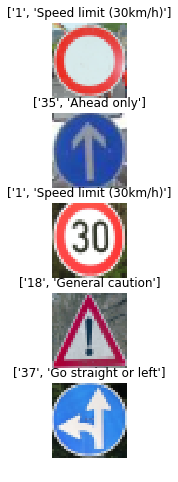

In [25]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def test_net(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data})
    return pred_sign

#X_test_data=np.uint8(np.zeros((5,32,32,3)))
X_test_web = np.sum(test_img/3, axis=3, keepdims=True)
X_test_web=X_test_web.astype(np.float32)
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_classes=test_net(X_test_web, sess)


plt.figure(figsize=(12, 8))
for i in range(5):
    #print(final_label_name[i])
    plt.subplot(5,1, i+1)
    plt.imshow(test_img[i]) 
    plt.title(final_label_name[signs_classes[i]])
    plt.axis('off')
plt.show()

In [28]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data})
    print(prob)
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_top_5=test_net(X_test_web, sess)
    #print(X_test_web)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.]]


In [ ]:
print(signs_top_5)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

In [ ]:
image=X_train[index]
print(image.shape)
plt.figure(figsize=(5,5))
plt.imshow(X_train[index])


In [ ]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.axis('off')

plt.show()